# New Section

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 18214231694213589119, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 15701340352
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 17056085811282401117
 physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0"]

In [ ]:
!cat /proc/meminfo

MemTotal:       26751732 kB
MemFree:        23028924 kB
MemAvailable:   25360484 kB
Buffers:           78160 kB
Cached:          2326972 kB
SwapCached:            0 kB
Active:          1193184 kB
Inactive:        2021572 kB
Active(anon):     622144 kB
Inactive(anon):     8556 kB
Active(file):     571040 kB
Inactive(file):  2013016 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:               608 kB
Writeback:             0 kB
AnonPages:        809480 kB
Mapped:           586276 kB
Shmem:              9212 kB
Slab:             207324 kB
SReclaimable:     140572 kB
SUnreclaim:        66752 kB
KernelStack:        4800 kB
PageTables:         8144 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:    13375864 kB
Committed_AS:    3911428 kB
VmallocTotal:   34359738367 kB
VmallocUsed:           0 kB
VmallocChunk:          0 kB
Percpu:             2080 kB
AnonHugePages:   

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import re
from datetime import datetime
import time
import seaborn as sns
import string
from string import punctuation
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from scipy.stats import norm
from wordcloud import WordCloud
from textwrap import wrap
from nltk.corpus import stopwords
from numpy import array
from numpy import asarray
from numpy import zeros
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Flatten
from keras.layers import GlobalMaxPooling1D
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import LSTM

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
Ratings=pd.read_csv('/content/drive/MyDrive/ColabData/ml-10m.zip (Unzipped Files)/ml-10M100K/ratings.dat',delimiter="::" ,engine='python',header=None,names=["UserID","MovieID","Rating","Timestamp"])
Ratings.head()

,UserID,MovieID,Rating,Timestamp
0,1,122,5.0,838985046
1,1,185,5.0,838983525
2,1,231,5.0,838983392
3,1,292,5.0,838983421
4,1,316,5.0,838983392


In [ ]:
Tags=pd.read_csv('/content/drive/MyDrive/ColabData/ml-10m.zip (Unzipped Files)/ml-10M100K/tags.dat',delimiter="::" ,engine='python',header=None,names=["UserID","MovieID","Reviews","Timestamp"])
Tags.head()

,UserID,MovieID,Reviews,Timestamp
0,15,4973,excellent!,1215184630
1,20,1747,politics,1188263867
2,20,1747,satire,1188263867
3,20,2424,chick flick 212,1188263835
4,20,2424,hanks,1188263835


In [ ]:
Movies=pd.read_csv('/content/drive/MyDrive/ColabData/ml-10m.zip (Unzipped Files)/ml-10M100K/movies.dat',delimiter="::" ,engine='python',header=None,names=["MovieID","MovieName","Genres"])
Movies.head()

,MovieID,MovieName,Genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


**Cleaning Data - Handle Missing values (Ratings data file)**

In [ ]:
Ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000054 entries, 0 to 10000053
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   UserID     int64  
 1   MovieID    int64  
 2   Rating     float64
 3   Timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 305.2 MB


In [ ]:
Ratings.count()

UserID       10000054
MovieID      10000054
Rating       10000054
Timestamp    10000054
dtype: int64

In [ ]:
Ratings.groupby('MovieID').count()

,UserID,Rating,Timestamp
MovieID,,,
1,26449,26449,26449
2,12032,12032,12032
3,7790,7790,7790
4,1764,1764,1764
5,7135,7135,7135
...,...,...,...
65088,8,8,8
65091,3,3,3
65126,3,3,3


In [ ]:
Tags.groupby('MovieID').count()

,UserID,Reviews,Timestamp
MovieID,,,
1,140,140,140
2,39,39,39
3,12,12,12
4,1,1,1
5,18,18,18
...,...,...,...
64993,5,5,5
65006,4,4,4
65037,7,7,7


In [ ]:
Data2= pd.merge(Ratings,Tags,on='UserID')
Data2.head()

,UserID,MovieID_x,Rating,Timestamp_x,MovieID_y,Reviews,Timestamp_y
0,48,267,5.0,1215134949,54290,Why the terrorists hate us,1215135611
1,48,267,5.0,1215134949,54775,The Director Should be given a grammy,1215135517
2,48,519,3.5,1215134907,54290,Why the terrorists hate us,1215135611
3,48,519,3.5,1215134907,54775,The Director Should be given a grammy,1215135517
4,48,1972,3.5,1215135112,54290,Why the terrorists hate us,1215135611


In [ ]:
Data2.shape

(45176306, 7)

In [ ]:
Data3=pd.merge(Data2,Movies,right_on='MovieID',left_on='MovieID_y')
Data3.head()

,UserID,MovieID_x,Rating,Timestamp_x,MovieID_y,Reviews,Timestamp_y,MovieID,MovieName,Genres
0,48,267,5.0,1215134949,54290,Why the terrorists hate us,1215135611,54290,Bratz: The Movie (2007),Comedy
1,48,519,3.5,1215134907,54290,Why the terrorists hate us,1215135611,54290,Bratz: The Movie (2007),Comedy
2,48,1972,3.5,1215135112,54290,Why the terrorists hate us,1215135611,54290,Bratz: The Movie (2007),Comedy
3,48,2447,5.0,1215134977,54290,Why the terrorists hate us,1215135611,54290,Bratz: The Movie (2007),Comedy
4,48,2696,3.5,1215135188,54290,Why the terrorists hate us,1215135611,54290,Bratz: The Movie (2007),Comedy


In [ ]:
Sentiment=Data3.loc[Data3.MovieID_x==Data3.MovieID_y , :]
Sentiment.head()

,UserID,MovieID_x,Rating,Timestamp_x,MovieID_y,Reviews,Timestamp_y,MovieID,MovieName,Genres
1126,48,54775,4.5,1215135477,54775,The Director Should be given a grammy,1215135517,54775,War (2007),Action|Thriller
5561,33784,54775,1.0,1188041602,54775,The Director Should Be Be Shot...In The Mouth!,1188041420,54775,War (2007),Action|Thriller
6706,75,353,3.5,1162160220,353,tissit,1162160415,353,"Crow, The (1994)",Action|Crime|Fantasy|Thriller
6760,10084,353,5.0,1137588789,353,romance,1137588807,353,"Crow, The (1994)",Action|Crime|Fantasy|Thriller
6912,14918,353,4.0,1189770250,353,bird guardian spirit,1200473832,353,"Crow, The (1994)",Action|Crime|Fantasy|Thriller


In [ ]:
Sentiment['Year'] = Sentiment['Timestamp_y'].apply(lambda x: time.strftime('%Y', time.localtime(x)))
Sentiment=Sentiment.drop(['MovieID_x','MovieID_y',"Timestamp_x",'Timestamp_y'],axis=1)
Sentiment.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,UserID,Rating,Reviews,MovieID,MovieName,Genres,Year
1126,48,4.5,The Director Should be given a grammy,54775,War (2007),Action|Thriller,2008
5561,33784,1.0,The Director Should Be Be Shot...In The Mouth!,54775,War (2007),Action|Thriller,2007
6706,75,3.5,tissit,353,"Crow, The (1994)",Action|Crime|Fantasy|Thriller,2006
6760,10084,5.0,romance,353,"Crow, The (1994)",Action|Crime|Fantasy|Thriller,2006
6912,14918,4.0,bird guardian spirit,353,"Crow, The (1994)",Action|Crime|Fantasy|Thriller,2008


In [ ]:
Movie.duplicated()

0           False
1           False
2           False
3           False
4           False
            ...  
45176301    False
45176302    False
45176303    False
45176304    False
45176305    False
Length: 45176306, dtype: bool

In [ ]:
Movie.shape

(45176306, 7)

In [ ]:
Ratings.isnull().sum()

UserID       0
MovieID      0
Rating       0
Timestamp    0
dtype: int64

In [ ]:
Ratings.isna().sum()

UserID       0
MovieID      0
Rating       0
Timestamp    0
dtype: int64

In [ ]:
Ratings['Rating'].describe()

count    1.000005e+07
mean     3.512422e+00
std      1.060418e+00
min      5.000000e-01
25%      3.000000e+00
50%      4.000000e+00
75%      4.000000e+00
max      5.000000e+00
Name: Rating, dtype: float64

In [ ]:
Ratings["Date"]=pd.to_datetime(Ratings['Timestamp'],format='%Y%m%d', errors='ignore')
Ratings.head()

,UserID,MovieID,Rating,Timestamp,Date
0,1,122,5.0,838985046,838985046
1,1,185,5.0,838983525,838983525
2,1,231,5.0,838983392,838983392
3,1,292,5.0,838983421,838983421
4,1,316,5.0,838983392,838983392


In [ ]:
def Sentiment(series):
    if series <= 3.5:
        return "Negetive"

    elif  series>3.5:
        return "Positive"

Ratings['Sentiment'] = Ratings['Rating'].apply(Sentiment)
Ratings.head()

,UserID,MovieID,Rating,Year,Sentiment
0,1,122,5.0,1996,Positive
1,1,185,5.0,1996,Positive
2,1,231,5.0,1996,Positive
3,1,292,5.0,1996,Positive
4,1,316,5.0,1996,Positive


**Visualizations**


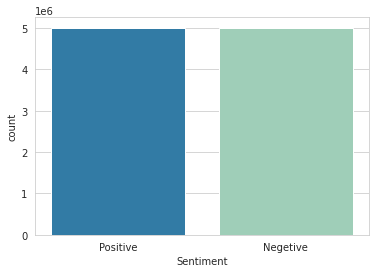

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Sentiment',data=Ratings, palette='YlGnBu_r')

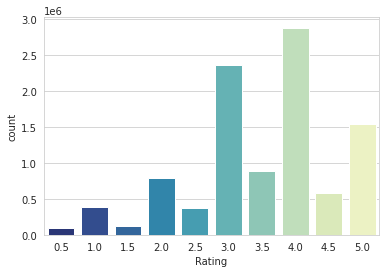

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Rating',data=Ratings, palette='YlGnBu_r')

In [ ]:
Ratings.groupby('Rating').count()

,UserID,MovieID,Timestamp,Date
Rating,,,,
0.5,94988,94988,94988,94988
1.0,384180,384180,384180,384180
1.5,118278,118278,118278,118278
2.0,790306,790306,790306,790306
2.5,370178,370178,370178,370178
3.0,2356676,2356676,2356676,2356676
3.5,879764,879764,879764,879764
4.0,2875850,2875850,2875850,2875850
4.5,585022,585022,585022,585022


<Figure size 1800x800 with 0 Axes>

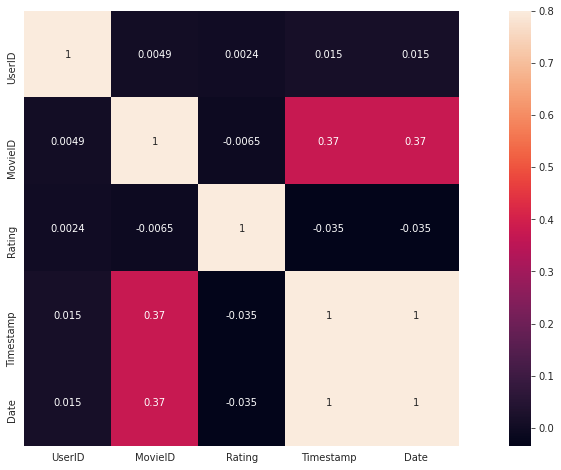

In [ ]:
plt.figure(figsize=(18,8),dpi=100,)
plt.subplots(figsize=(18,8))
sns.heatmap(data=Ratings.corr(),square=True,vmax=0.8,annot=True)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu=3.51 and sigma=1.06
 


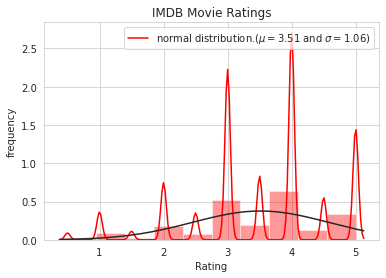

In [ ]:

sns.distplot(a=Ratings['Rating'],hist=True,bins=10,fit=norm,color="red")
plt.title("IMDB Movie Ratings")
plt.ylabel("frequency")
mu,sigma=norm.fit(Ratings['Rating'])
print("\n mu={:.2f} and sigma={:.2f}\n ".format(mu,sigma))
plt.legend(["normal distribution.($\mu=${:.2f} and $\sigma=${:.2f})".format(mu,sigma)])
plt.show()

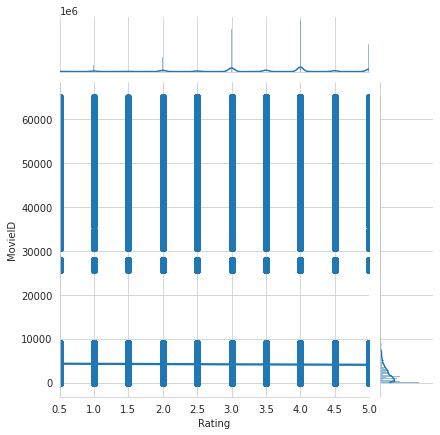

In [ ]:
sns.jointplot(x=Ratings['Rating'],y=Ratings['MovieID'],kind="reg",dropna=True)

In [ ]:
Ratings['Year'] = Ratings['Timestamp'].apply(lambda x: time.strftime('%Y', time.localtime(x)))
Ratings.head()

,UserID,MovieID,Rating,Timestamp,Date,Year
0,1,122,5.0,838985046,838985046,1996
1,1,185,5.0,838983525,838983525,1996
2,1,231,5.0,838983392,838983392,1996
3,1,292,5.0,838983421,838983421,1996
4,1,316,5.0,838983392,838983392,1996


In [ ]:
Ratings=Ratings.drop(['Timestamp','Date'],axis=1)
Ratings.head()

,UserID,MovieID,Rating,Year
0,1,122,5.0,1996
1,1,185,5.0,1996
2,1,231,5.0,1996
3,1,292,5.0,1996
4,1,316,5.0,1996


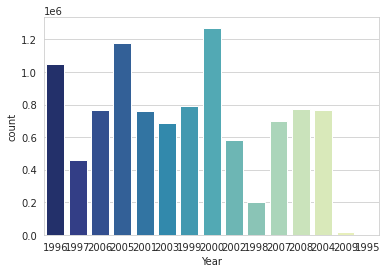

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Year',data=Ratings, palette='YlGnBu_r')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


TypeError: ignored

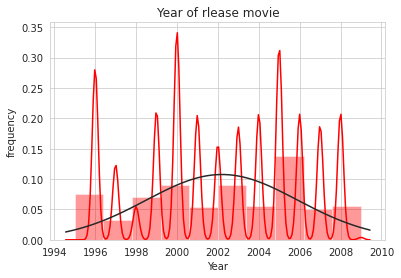

In [ ]:
sns.distplot(a=Ratings['Year'],hist=True,bins=10,fit=norm,color="red")
plt.title("Year of rlease movie")
plt.ylabel("frequency")
mu,sigma=norm.fit(Ratings['Year'])
print("\n mu={:.2f} and sigma={:.2f}\n ".format(mu,sigma))
plt.legend(["normal distribution.($\mu=${:.2f} and $\sigma=${:.2f})".format(mu,sigma)])
plt.show()

In [ ]:
Data=Ratings.groupby('Year').count()
Data

,UserID,MovieID,Rating
Year,,,
1995,3,3,3
1996,1047618,1047618,1047618
1997,459947,459947,459947
1998,202092,202092,202092
1999,788793,788793,788793
2000,1271623,1271623,1271623
2001,759141,759141,759141
2002,583409,583409,583409
2003,688694,688694,688694


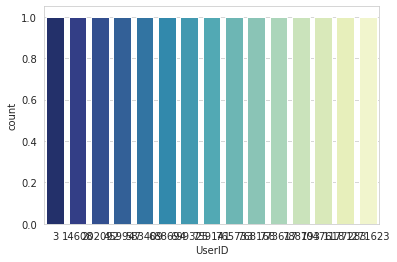

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='UserID',data=Data, palette='YlGnBu_r')

**FOR MOVIE Data Set**

In [ ]:
Movies.head()

,MovieID,MovieName,Genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
Movie_ratings = pd.merge(Ratings, Movies)
Movie_ratings.head()

,UserID,MovieID,Rating,Year,MovieName,Genres
0,1,122,5.0,1996,Boomerang (1992),Comedy|Romance
1,139,122,3.0,2000,Boomerang (1992),Comedy|Romance
2,149,122,2.5,2005,Boomerang (1992),Comedy|Romance
3,182,122,3.0,1999,Boomerang (1992),Comedy|Romance
4,215,122,4.5,2004,Boomerang (1992),Comedy|Romance


In [ ]:
Movie=Movie_ratings.groupby(['MovieID', 'MovieName', 'Genres', 'Year'], as_index=False)['Rating'].mean()
Movie.head(10)

,MovieID,MovieName,Genres,Year,Rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1996,4.127910
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1997,3.869379
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1998,3.908824
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1999,3.985908
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2000,4.142095
5,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2001,4.097962
6,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2002,4.035044
7,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2003,3.982873
8,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2004,3.848728
9,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2005,3.763505


In [ ]:
all_genres = []
for x in Movie.Genres:
    all_genres.extend(x.split('|'))
all_genres = pd.unique(all_genres)

print(all_genres)

['Adventure' 'Animation' 'Children' 'Comedy' 'Fantasy' 'Romance' 'Drama'
 'Action' 'Crime' 'Thriller' 'Horror' 'Mystery' 'Sci-Fi' 'IMAX'
 'Documentary' 'War' 'Musical' 'Film-Noir' 'Western' '(no genres listed)']


In [ ]:
split_genres = Movie['Genres'].str.split('|')
split_data = pd.DataFrame({'Genres':split_genres.values}, index = split_genres.index)

split_data['Rating'] = Movie['Rating']
split_data['MovieName'] = Movie['MovieName']
split_data['Year'] = Movie['Year']
split_data['MovieID'] = Movie['MovieID']

split_data.head()

,Genres,Rating,MovieName,Year,MovieID
0,"[Adventure, Animation, Children, Comedy, Fantasy]",4.127910,Toy Story (1995),1996,1
1,"[Adventure, Animation, Children, Comedy, Fantasy]",3.869379,Toy Story (1995),1997,1
2,"[Adventure, Animation, Children, Comedy, Fantasy]",3.908824,Toy Story (1995),1998,1
3,"[Adventure, Animation, Children, Comedy, Fantasy]",3.985908,Toy Story (1995),1999,1
4,"[Adventure, Animation, Children, Comedy, Fantasy]",4.142095,Toy Story (1995),2000,1


In [ ]:
objs = [split_data, pd.DataFrame(split_data['Genres'].tolist())]
new_df = pd.concat(objs, axis=1).drop('Genres', axis=1).sort_values('Rating', ascending=False)
final_ratings = pd.melt(new_df, var_name='Genre', value_name="Genres", id_vars=['MovieID','Rating','MovieName', 'Year'], value_vars=[0,1,2,3,4,5,6,7]).sort_values('Rating', ascending=False)
final_ratings = final_ratings[final_ratings.Genres.notnull()].drop("Genre", axis=1)
final_ratings.sort_values(by=['MovieID'], inplace=True)
final_ratings.head()

,MovieID,Rating,MovieName,Year,Genres
15056,1,3.763505,Toy Story (1995),2005,Adventure
19357,1,3.669319,Toy Story (1995),2007,Adventure
249313,1,3.669319,Toy Story (1995),2007,Comedy
18035,1,3.701235,Toy Story (1995),2006,Adventure
171339,1,3.701235,Toy Story (1995),2006,Children


In [ ]:
# Total number of movies with a specific genre counted multiple times for multi genre movies
genre_count = final_ratings.groupby('Genres').count()[['MovieID']]
genre_count = genre_count.rename(columns = {'MovieID': 'count'})
genre_count = genre_count.sort_values('count', ascending=False)

count = genre_count['count'].tolist()
genre = genre_count.index.tolist()
genre_count = pd.DataFrame({'Genre': genre, 'count': count})
genre_count

,Genre,count
0,Drama,36717
1,Comedy,27114
2,Thriller,12626
3,Romance,12233
4,Action,11026
5,Crime,7816
6,Adventure,7803
7,Horror,7357
8,Sci-Fi,5772
9,Children,4546


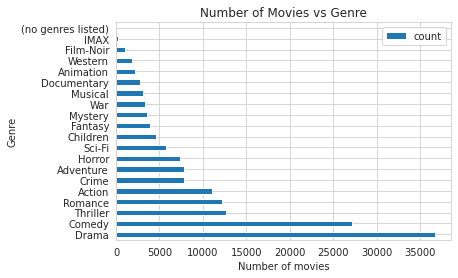

In [ ]:
genre_count.plot.barh(x = 'Genre', y = 'count')
plt.xlabel('Number of movies')
plt.ylabel('Genre')
plt.title('Number of Movies vs Genre')

plt.show()

In [ ]:
avg_genre_ratings = final_ratings.groupby(['Genres'], as_index=False)['Rating'].mean()
avg_genre_ratings = avg_genre_ratings.sort_values(by=['Rating'], ascending=False)
avg_genre_ratings

,Genres,Rating
10,Film-Noir,3.740752
0,(no genres listed),3.583333
18,War,3.485943
7,Documentary,3.457310
14,Mystery,3.384082
8,Drama,3.368075
19,Western,3.319660
6,Crime,3.317828
15,Romance,3.305265
13,Musical,3.296398


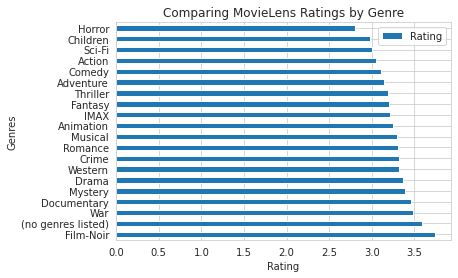

In [ ]:
avg_genre_ratings.plot.barh(x = 'Genres', y='Rating')
plt.xlabel('Rating')
plt.ylabel('Genres')
plt.title('Comparing MovieLens Ratings by Genre')

plt.show()

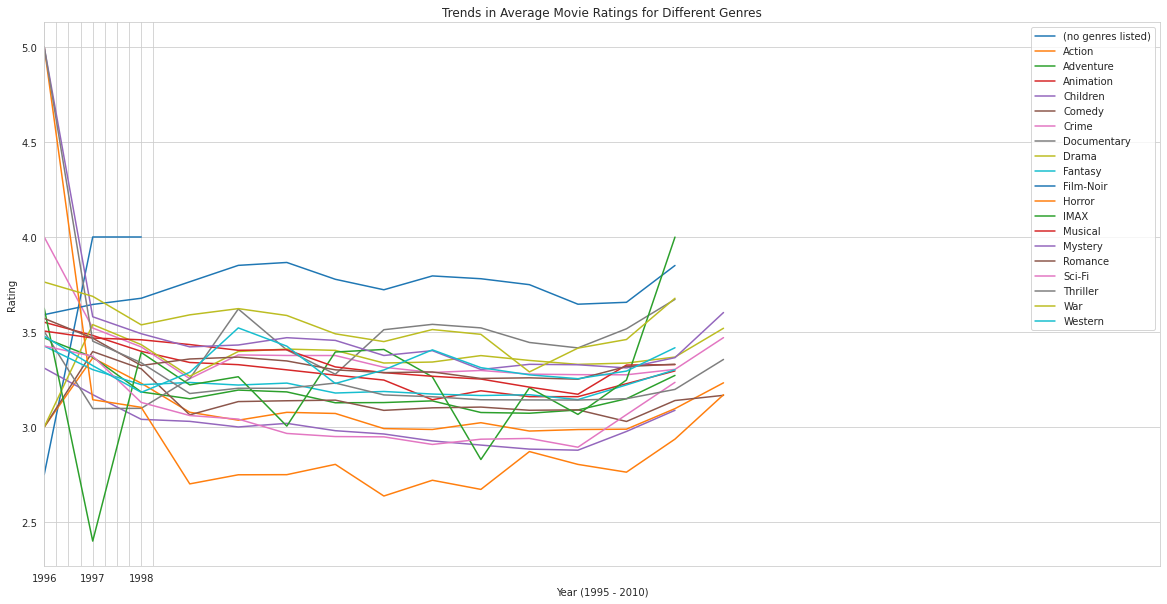

In [ ]:
rating_acrossYears = final_ratings.groupby(['Genres', 'Year'], as_index=False)['Rating'].mean()

fig, ax = plt.subplots(figsize=(20, 10))
for genre, year in rating_acrossYears.groupby('Genres'):
    year.plot(x='Year', y='Rating', ax=ax, label=genre)

plt.xlabel('Year (1995 - 2010)')
plt.xlim(0, 23)
plt.ylabel('Rating')
plt.title('Trends in Average Movie Ratings for Different Genres')
plt.show()

Reviews Data set

In [ ]:
Tags.head()

,UserID,MovieID,Reviews,Timestamp
0,15,4973,excellent!,1215184630
1,20,1747,politics,1188263867
2,20,1747,satire,1188263867
3,20,2424,chick flick 212,1188263835
4,20,2424,hanks,1188263835


In [ ]:
Tags['Year'] = Tags['Timestamp'].apply(lambda x: time.strftime('%Y', time.localtime(x)))
Tags.head()

,UserID,MovieID,Reviews,Timestamp,Year
0,15,4973,excellent!,1215184630,2008
1,20,1747,politics,1188263867,2007
2,20,1747,satire,1188263867,2007
3,20,2424,chick flick 212,1188263835,2007
4,20,2424,hanks,1188263835,2007


In [ ]:
Tags=Tags.drop(['Timestamp'],axis=1)
Tags.head()

,UserID,MovieID,Reviews,Year
0,15,4973,excellent!,2008
1,20,1747,politics,2007
2,20,1747,satire,2007
3,20,2424,chick flick 212,2007
4,20,2424,hanks,2007


In [ ]:
Tags.shape

(95580, 4)

In [ ]:
print(Tags.info())
Tags.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95580 entries, 0 to 95579
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   UserID   95580 non-null  int64 
 1   MovieID  95580 non-null  int64 
 2   Reviews  95564 non-null  object
 3   Year     95580 non-null  object
dtypes: int64(2), object(2)
memory usage: 2.9+ MB
None


UserID      0
MovieID     0
Reviews    16
Year        0
dtype: int64

In [ ]:
Tags=Tags.dropna()
Tags.isnull().sum()

UserID     0
MovieID    0
Reviews    0
Year       0
dtype: int64

In [ ]:
Tags.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
95575    False
95576    False
95577    False
95578    False
95579    False
Length: 95564, dtype: bool

In [ ]:
def preprocess_text(sen):
    # Removing html tags
    sentence = remove_tags(sen)

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

In [ ]:
TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    return TAG_RE.sub('', text)

In [ ]:
X = []
sentences = list(Sentiment['Reviews'])
for sen in sentences:
    X.append(preprocess_text(sen))

In [ ]:
print(X)

['The Director Should be given grammy', 'The Director Should Be Be Shot In The Mouth ', 'tissit', 'romance', 'bird guardian spirit', 'Brandon Lee', 'gothic', 'My DVDs', 'cult film', 'gothic', 'bittersweet', 'dreamlike', 'elegiac', 'goth', 'gritty', 'menacing', 'stylized', 'Nudity Rear ', 'adapted from comic', 'gothic', 'comic book', 'Proyas', 'Sexualized violence', 'revenge', 'Crappy Remake', 'cool', 'film noir', 'want to own', 'good war movie', 'Jude Law', 'want to own', 'army', 'Best War Films', 'Ed Harris', 'good war movie', 'Jude Law', 'Nazis', 'Rachel Weisz', 'Russia', 'titillating', 'World War ', 'World War II', 'War', 'good war movie', 'World War II', 'World War II', 'DVD', 'World War II', 'army', 'end of the world', 'snipers', 'World War ', 'World War II', 'scorsese', 'Martin Scorsese', 'Tumey DVDs', 'remake', 'Martin Scorsese', 'deniro', 'scary', 'Disney', 'Disney', 'animation', 'erlend DVDs', 'Disney', 'dogs', 'puppies', 'spaghetti', 'talking animals', 'Cartoon', ' vcd', 'Dis

In [ ]:
for i in range(len(X)):
  X[i] = X[i].lower()

In [ ]:
print(X)

['the director should be given grammy', 'the director should be be shot in the mouth ', 'tissit', 'romance', 'bird guardian spirit', 'brandon lee', 'gothic', 'my dvds', 'cult film', 'gothic', 'bittersweet', 'dreamlike', 'elegiac', 'goth', 'gritty', 'menacing', 'stylized', 'nudity rear ', 'adapted from comic', 'gothic', 'comic book', 'proyas', 'sexualized violence', 'revenge', 'crappy remake', 'cool', 'film noir', 'want to own', 'good war movie', 'jude law', 'want to own', 'army', 'best war films', 'ed harris', 'good war movie', 'jude law', 'nazis', 'rachel weisz', 'russia', 'titillating', 'world war ', 'world war ii', 'war', 'good war movie', 'world war ii', 'world war ii', 'dvd', 'world war ii', 'army', 'end of the world', 'snipers', 'world war ', 'world war ii', 'scorsese', 'martin scorsese', 'tumey dvds', 'remake', 'martin scorsese', 'deniro', 'scary', 'disney', 'disney', 'animation', 'erlend dvds', 'disney', 'dogs', 'puppies', 'spaghetti', 'talking animals', 'cartoon', ' vcd', 'dis

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
tokens_without_sw = [word for word in X if not word in stopwords.words()]

print(tokens_without_sw)

['the director should be given grammy', 'the director should be be shot in the mouth ', 'tissit', 'romance', 'bird guardian spirit', 'brandon lee', 'gothic', 'my dvds', 'cult film', 'gothic', 'bittersweet', 'dreamlike', 'elegiac', 'goth', 'gritty', 'menacing', 'stylized', 'nudity rear ', 'adapted from comic', 'gothic', 'comic book', 'proyas', 'sexualized violence', 'revenge', 'crappy remake', 'cool', 'film noir', 'want to own', 'good war movie', 'jude law', 'want to own', 'army', 'best war films', 'ed harris', 'good war movie', 'jude law', 'nazis', 'rachel weisz', 'russia', 'titillating', 'world war ', 'world war ii', 'good war movie', 'world war ii', 'world war ii', 'dvd', 'world war ii', 'army', 'end of the world', 'snipers', 'world war ', 'world war ii', 'scorsese', 'martin scorsese', 'tumey dvds', 'remake', 'martin scorsese', 'deniro', 'scary', 'disney', 'disney', 'animation', 'erlend dvds', 'disney', 'dogs', 'puppies', 'spaghetti', 'talking animals', 'cartoon', ' vcd', 'disney', '

In [ ]:
y=Sentiment['Reviews']
y = np.array(list(map(lambda x: 1 if x=="Positive" else 0, y)))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

Random Forest

In [ ]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
# Adding 1 because of reserved 0 index
vocab_size = len(tokenizer.word_index) + 1

maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [ ]:


embeddings_dictionary = dict()
glove_file = open('/content/drive/MyDrive/ColabData/glove.6B.100d.txt.zip (Unzipped Files)/glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

In [ ]:
embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [ ]:
model = Sequential()
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)

model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 100)          725500    
_________________________________________________________________
flatten (Flatten)            (None, 10000)             0         
_________________________________________________________________
dense (Dense)                (None, 1)                 10001     
Total params: 735,501
Trainable params: 10,001
Non-trainable params: 725,500
_________________________________________________________________
None


In [ ]:
history = model.fit(X_train, y_train, batch_size=512, epochs=10, verbose=1, validation_split=0.2)

Epoch 1/10
57/57 [==============================] - 1s 9ms/step - loss: 0.0050 - acc: 0.9999 - val_loss: 0.0060 - val_acc: 0.9999
Epoch 2/10
57/57 [==============================] - 0s 8ms/step - loss: 0.0049 - acc: 0.9999 - val_loss: 0.0058 - val_acc: 0.9999
Epoch 3/10
57/57 [==============================] - 0s 8ms/step - loss: 0.0048 - acc: 0.9999 - val_loss: 0.0057 - val_acc: 0.9999
Epoch 4/10
57/57 [==============================] - 0s 8ms/step - loss: 0.0047 - acc: 0.9999 - val_loss: 0.0056 - val_acc: 0.9999
Epoch 5/10
57/57 [==============================] - 0s 8ms/step - loss: 0.0046 - acc: 0.9999 - val_loss: 0.0054 - val_acc: 0.9999
Epoch 6/10
57/57 [==============================] - 0s 8ms/step - loss: 0.0045 - acc: 0.9999 - val_loss: 0.0053 - val_acc: 0.9999
Epoch 7/10
57/57 [==============================] - 0s 8ms/step - loss: 0.0044 - acc: 0.9999 - val_loss: 0.0052 - val_acc: 0.9999
Epoch 8/10
57/57 [==============================] - 0s 8ms/step - loss: 0.0043 - acc: 0.99

In [ ]:
score = model.evaluate(X_test, y_test, verbose=1)

281/281 [==============================] - 1s 2ms/step - loss: 0.0058 - acc: 0.9998


In [ ]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.0058452836237847805
Test Accuracy: 0.9997768402099609


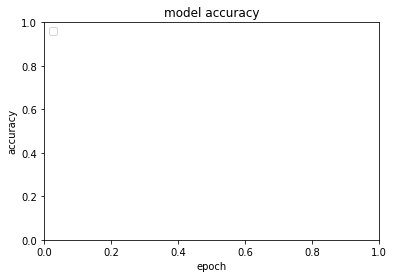

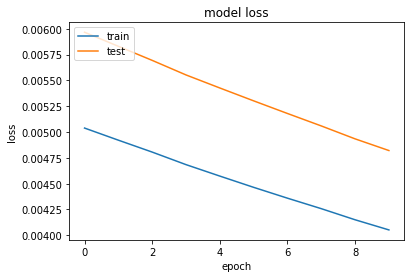

In [ ]:
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

***RNN Model***

In [ ]:
model = Sequential()
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)
model.add(LSTM(128))

model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [ ]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 100)          725500    
_________________________________________________________________
lstm (LSTM)                  (None, 128)               117248    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 842,877
Trainable params: 117,377
Non-trainable params: 725,500
_________________________________________________________________
None


In [ ]:
history = model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.3)

score = model.evaluate(X_test, y_test, verbose=1)

Epoch 1/6
197/197 [==============================] - 3s 13ms/step - loss: 6.5355e-05 - acc: 1.0000 - val_loss: 1.5271e-06 - val_acc: 1.0000
Epoch 2/6
197/197 [==============================] - 3s 13ms/step - loss: 5.0415e-05 - acc: 1.0000 - val_loss: 1.4028e-06 - val_acc: 1.0000
Epoch 3/6
197/197 [==============================] - 3s 13ms/step - loss: 1.3070e-06 - acc: 1.0000 - val_loss: 1.2150e-06 - val_acc: 1.0000
Epoch 4/6
197/197 [==============================] - 3s 13ms/step - loss: 1.1348e-06 - acc: 1.0000 - val_loss: 1.0577e-06 - val_acc: 1.0000
Epoch 5/6
197/197 [==============================] - 3s 13ms/step - loss: 9.9018e-07 - acc: 1.0000 - val_loss: 9.2507e-07 - val_acc: 1.0000
Epoch 6/6
281/281 [==============================] - 1s 4ms/step - loss: 8.1252e-07 - acc: 1.0000


In [ ]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 8.125205113174161e-07
Test Accuracy: 1.0


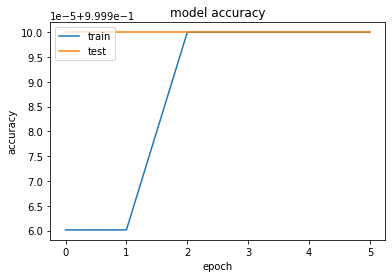

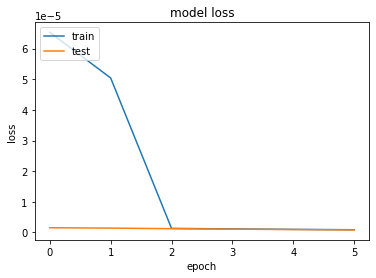

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

RNN 2

In [ ]:
# feel free to use this import
from collections import Counter
## Build a dictionary that maps words to integers
counts = Counter(X)

In [ ]:
vocab = sorted(counts, key=counts.get, reverse=True)
print(vocab)

['classic', ' ', 'dvd', 'erlend dvds', 'action', 'seen more than once', 'sci fi', 'based on book', 'comedy', 'tumey dvds', 'time travel', 'murder', 'fantasy', ' s', 'oscar best picture ', 'comic book', 'anime', 'quirky', 'atmospheric', 'drugs', 'owned', 'nudity topless ', 'bibliothek', 'dystopia', 'romance', 'disney', 'overrated', 'drama', 'world war ii', 'aliens', 'stylized', 'war', 'boring', 'nudity topless brief ', 'crime', 'johnny depp', 'disturbing', 'funny', 'tense', 'history', 'surreal', 'space', 'zombies', 'politics', 'afi ', 'true story', 'super hero', 'divx', 'seen ', 'dark comedy', 'animation', 'magic', 'ummarti ', 'humorous', 'violence', 'teen', 'need to own', 'superhero', 'pixar', 'adventure', 'gay', 'sequel', 'remake', 'chick flick', 'nudity topless notable ', 'my movies', 'want to see again', 'adapted from book', 'divx ', 'tom hanks', 'serial killer', 'martial arts', 'post apocalyptic', 'japan', 'twist ending', 'musical', 'hilarious', 'r', 'hitchcock', 'prison', 'mafia',

In [ ]:
vocab_to_int = {word: ii for ii, word in enumerate(vocab, 1)}

In [ ]:
print(vocab_to_int)

{'classic': 1, ' ': 2, 'dvd': 3, 'erlend dvds': 4, 'action': 5, 'seen more than once': 6, 'sci fi': 7, 'based on book': 8, 'comedy': 9, 'tumey dvds': 10, 'time travel': 11, 'murder': 12, 'fantasy': 13, ' s': 14, 'oscar best picture ': 15, 'comic book': 16, 'anime': 17, 'quirky': 18, 'atmospheric': 19, 'drugs': 20, 'owned': 21, 'nudity topless ': 22, 'bibliothek': 23, 'dystopia': 24, 'romance': 25, 'disney': 26, 'overrated': 27, 'drama': 28, 'world war ii': 29, 'aliens': 30, 'stylized': 31, 'war': 32, 'boring': 33, 'nudity topless brief ': 34, 'crime': 35, 'johnny depp': 36, 'disturbing': 37, 'funny': 38, 'tense': 39, 'history': 40, 'surreal': 41, 'space': 42, 'zombies': 43, 'politics': 44, 'afi ': 45, 'true story': 46, 'super hero': 47, 'divx': 48, 'seen ': 49, 'dark comedy': 50, 'animation': 51, 'magic': 52, 'ummarti ': 53, 'humorous': 54, 'violence': 55, 'teen': 56, 'need to own': 57, 'superhero': 58, 'pixar': 59, 'adventure': 60, 'gay': 61, 'sequel': 62, 'remake': 63, 'chick flick':

In [ ]:
def generate_wordcloud(data,title):
  wc = WordCloud(width=400, height=330, max_words=150,colormap="Dark2").generate_from_frequencies(data)
  plt.figure(figsize=(10,8))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  plt.title('\n'.join(wrap(title,60)),fontsize=13)
  plt.show()

# Transposing document term matrix
df_dtm=df_dtm.transpose()

# Plotting word cloud for each product
for index,product in enumerate(df_dtm.columns):
  generate_wordcloud(df_dtm[product].sort_values(ascending=False),product)

In [ ]:
def get_text_processing(text):
    stpword = stopwords.words('english')
    no_punctuation = [char for char in text if char not in string.punctuation]
    no_punctuation = ''.join(no_punctuation)
    return ' '.join([word for word in no_punctuation.split() if word.lower() not in stpword])

**Predict** **Sentiment**

In [ ]:
instance = 'this movie is verry super'
Rat=3
print(instance)

this movie is verry super


In [ ]:
instance = tokenizer.texts_to_sequences(instance)

flat_list = []
for sublist in instance:
    for item in sublist:
        flat_list.append(item)

flat_list = [flat_list]

instance = pad_sequences(flat_list, padding='post', maxlen=maxlen)

model.predict(instance)

array([[8.150196e-07]], dtype=float32)

In [ ]:
def Cor_rating(series):
  if array[0] > 0.5& Rat<=3:
    return "your Comment Is Positive Plrase Enter Rating More than 3"
  elif array[0] > 0.5& Rat>=3:
    return "you enter Coreect Rating"
  elif array[0]< 0.5 & Rat<=3:
    return "you enter Correct rating"
  elif array[0]<0.5 & Rat >= 3:
    return "Enter rating is Worng pleace enter less rating"


In [ ]:
model.predict(instance).apply(Cor_rating)

AttributeError: ignored

###Final Data Set Creation for Sentiment Analysis.

**Sentiment Analysis**